In [1]:
# Importation des bibliothèques nécessaires

#Bibliotheque de traitement de donnees
import pandas as pd
import numpy as np
import math

# Bibliotheques de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Lecture des données à partir d'un fichier CSV
df = pd.read_csv(r'Location_Data.csv', encoding='windows-1252')

In [11]:
!du -h *

24M	GRADIENT BOOSTING.pdf
792K	Location_Data.csv
24K	MusaJoofML.ipynb


In [3]:
# affichage des premiers lignes du dataframe
df.head()

,prix en MAD,emplacement,surface en m²,nombre des pièces,nombre des chambres,numéro d'étage
0,15000,Rabat Rabat-Salé-Zemmour-Zaër,170.0,5.0,3.0,1.0
1,8500,Casablanca Casablanca-Settat,95.0,3.0,2.0,NaN
2,10000,Bouskoura Casablanca-Settat,140.0,4.0,3.0,2.0
3,3700,Kénitra Rabat-Salé-Zemmour-Zaër,80.0,3.0,2.0,2.0
4,6500,Casablanca Casablanca-Settat,80.0,3.0,2.0,4.0


In [4]:
# Statististiques sur les donnees
df.describe()

,prix en MAD,surface en m²,nombre des pièces,nombre des chambres,numéro d'étage
count,1.810000e+04,17097.000000,17083.000000,17478.000000,11656.000000
mean,9.140297e+03,111.069252,3.341509,2.150532,3.123456
std,6.850523e+04,135.171865,1.268341,0.792731,2.066408
min,0.000000e+00,11.000000,1.000000,1.000000,1.000000
25%,4.500000e+03,70.000000,3.000000,2.000000,2.000000
50%,7.000000e+03,98.000000,3.000000,2.000000,3.000000
75%,1.000000e+04,130.000000,4.000000,3.000000,4.000000
max,5.000000e+06,10530.000000,13.000000,7.000000,20.000000


In [5]:
# Affichage du nombre de valeurs manquantes dans chaque colonne
nombre_val_manq = df.isnull().sum()
print(30*'*'+'  Valeurs mannquantes  '+20*'*')
print(nombre_val_manq)

******************************  Valeurs mannquantes  ********************
prix en MAD               0
emplacement             529
surface en m²          1003
nombre des pièces      1017
nombre des chambres     622
numéro d'étage         6444
dtype: int64


In [6]:
# Suppression des lignes ayant 0 comme valeur dans la colonne 'prix en MAD': valeurs a  predire
df = df[df['prix en MAD'] != 0]

In [7]:
# Comptage des occurrences de chaque valeur dans la colonne 'numéro d'étage'
print(30*'*'+' Etages '+20*'*')
numEtg = df["numéro d'étage"].value_counts()
print(numEtg)

****************************** Etages ********************
numéro d'étage
2.0     2700
3.0     2422
1.0     2203
4.0     1816
5.0     1154
6.0      387
7.0      252
8.0       87
10.0      66
9.0       59
11.0      23
20.0      21
12.0      13
15.0      11
14.0       9
13.0       9
18.0       7
16.0       6
17.0       4
19.0       1
Name: count, dtype: int64


In [8]:
# Encodage de l'attribut catégoriel 'emplacement' en utilisant des entiers
l = list(df['emplacement'].unique())  #nombre de sites de location
n = len(l) # Taille
code = {} # dictionnaire
for i in range(n):
    code[l[i]] = i
df['emplacementMap'] = df['emplacement'].map(code)

In [12]:
df

,prix en MAD,emplacement,surface en m²,nombre des pièces,nombre des chambres,numéro d'étage,emplacementMap
0,15000,Rabat Rabat-Salé-Zemmour-Zaër,170.0,5.0,3.0,1.0,0
1,8500,Casablanca Casablanca-Settat,95.0,3.0,2.0,NaN,1
2,10000,Bouskoura Casablanca-Settat,140.0,4.0,3.0,2.0,2
3,3700,Kénitra Rabat-Salé-Zemmour-Zaër,80.0,3.0,2.0,2.0,3
4,6500,Casablanca Casablanca-Settat,80.0,3.0,2.0,4.0,1
...,...,...,...,...,...,...,...
18095,10000,Casablanca Casablanca-Settat,146.0,4.0,3.0,5.0,1
18096,5500,Marrakech Marrakech-Safi,70.0,2.0,1.0,NaN,4
18097,7000,Marrakech Marrakech-Safi,NaN,2.0,1.0,NaN,4
18098,6000,Taghazout Souss-Massaa,120.0,2.0,2.0,NaN,29


In [13]:
# Suppression de la colonne 'emplacement'
df2 = df.drop(columns=['emplacement'], axis=1)

In [17]:
df2

,prix en MAD,surface en m²,nombre des pièces,nombre des chambres,numéro d'étage,emplacementMap
0,15000.0,170,5,3,1,0
1,8500.0,95,3,2,3,1
2,10000.0,140,4,3,2,2
3,3700.0,80,3,2,2,3
4,6500.0,80,3,2,4,1
...,...,...,...,...,...,...
16895,10000.0,146,4,3,5,1
16896,5500.0,70,2,1,2,4
16897,7000.0,68,2,1,2,4
16898,6000.0,120,2,2,4,29


In [15]:
# Gestion des valeurs manquantes en utilisant l'imputation KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
df2["numéro d'étage"] = df2["numéro d'étage"].map(round)
df2["nombre des pièces"] = df2["nombre des pièces"].map(round)
df2["emplacementMap"] = df2["emplacementMap"].map(round)
df2["nombre des chambres"] = df2["nombre des chambres"].map(round)
df2["surface en m²"] = df2["surface en m²"].map(round)

In [16]:
df2

,prix en MAD,surface en m²,nombre des pièces,nombre des chambres,numéro d'étage,emplacementMap
0,15000.0,170,5,3,1,0
1,8500.0,95,3,2,3,1
2,10000.0,140,4,3,2,2
3,3700.0,80,3,2,2,3
4,6500.0,80,3,2,4,1
...,...,...,...,...,...,...
16895,10000.0,146,4,3,5,1
16896,5500.0,70,2,1,2,4
16897,7000.0,68,2,1,2,4
16898,6000.0,120,2,2,4,29


In [18]:
# Affichage du nombre de valeurs manquantes dans chaque colonne du DataFrame nettoyé
print(30*'*'+'  Valeurs manquantes  '+20*'*')
print(df2.isnull().sum())

******************************  Valeurs manquantes  ********************
prix en MAD            0
surface en m²          0
nombre des pièces      0
nombre des chambres    0
numéro d'étage         0
emplacementMap         0
dtype: int64


In [19]:
# Affichage des statistiques descriptives des données
print(30*'*'+'  Affichage des statistiques  '+20*'*')
print(df.describe())
# Affichage des cinq premières lignes du DataFrame
print(30*'*'+' Premieres lignes du dataframe  '+20*'*')
print(df.head())

******************************  Affichage des statistiques  ********************
        prix en MAD  surface en m²  nombre des pièces  nombre des chambres  \
count  1.690000e+04   16464.000000       16441.000000         16821.000000   
mean   9.789312e+03     111.756195           3.354236             2.154509   
std    7.085098e+04     137.200100           1.268343             0.793457   
min    1.300000e+02      11.000000           1.000000             1.000000   
25%    5.000000e+03      70.000000           3.000000             2.000000   
50%    7.500000e+03     100.000000           3.000000             2.000000   
75%    1.050000e+04     133.000000           4.000000             3.000000   
max    5.000000e+06   10530.000000          13.000000             7.000000   

       numéro d'étage  emplacementMap  
count    11250.000000    16900.000000  
mean         3.148622        4.659763  
std          2.077259        9.841028  
min          1.000000        0.000000  
25%          2.0

In [20]:
# Encodage de l'attribut catégoriel 'emplacement' en utilisant des entiers
l = list(df['emplacement'].unique())  #nombre de sites de location
n = len(l) # Taille
code = {}
for i in range(n):
    code[l[i]] = i
df['emplacementMap'] = df['emplacement'].map(code)

In [21]:
# Suppression de la colonne 'emplacement'
df2 = df.drop(columns=['emplacement'], axis=1)

In [22]:
# Gestion des valeurs manquantes en utilisant l'imputation KNN
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)
df2["numéro d'étage"] = df2["numéro d'étage"].map(round)
df2["nombre des pièces"] = df2["nombre des pièces"].map(round)
df2["emplacementMap"] = df2["emplacementMap"].map(round)
df2["nombre des chambres"] = df2["nombre des chambres"].map(round)
df2["surface en m²"] = df2["surface en m²"].map(round)

******************************  Valeurs manquantes  ********************
prix en MAD            0
surface en m²          0
nombre des pièces      0
nombre des chambres    0
numéro d'étage         0
emplacementMap         0
dtype: int64
******************************  Matrice de correlation  ********************


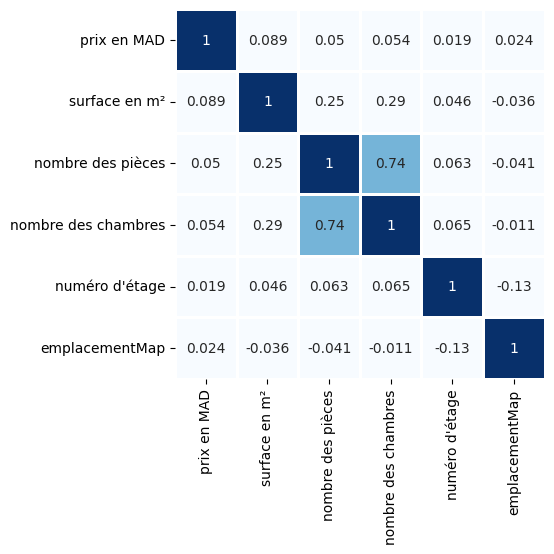

In [23]:
# Affichage du nombre de valeurs manquantes dans chaque colonne du DataFrame nettoyé
print(30*'*'+'  Valeurs manquantes  '+20*'*')
print(df2.isnull().sum())
# Calcul de la matrice de corrélation entre les variables
print(30*'*'+'  Matrice de correlation  '+20*'*')
ax1 = sns.heatmap(df2.corr(), cbar=0, linewidths=2,vmax=1, vmin=0.5, square=True, cmap='Blues', annot=True)
plt.show()

In [24]:
# Filtrage des données en fonction de certaines conditions
df3 = df2[(df2['prix en MAD'] <= 30000) & (df2['prix en MAD'] >= 2000) &
          (df2['surface en m²'] <= 325) & (df2['surface en m²'] >= 50) &
          (df2['emplacementMap'] <= 50) & (df2['nombre des pièces'] <= 13) & (df2['nombre des pièces'] > 1) & (df2['numéro d\'étage'] != 19) &
          (df2['nombre des chambres'] > 1)]

# Affichage du nombre de lignes dans le DataFrame filtré
len(df3)

12405

<Axes: xlabel='surface en m²', ylabel='prix en MAD'>

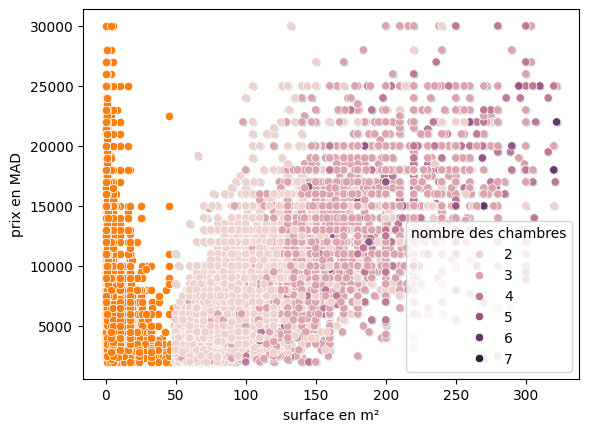

In [25]:
# Visualisation des relations entre certaines variables et le prix
sns.scatterplot(data=df3, x='surface en m²', y='prix en MAD')
sns.scatterplot(data=df3, x='emplacementMap', y='prix en MAD')
sns.scatterplot(data=df3, x='surface en m²', y='prix en MAD', hue='nombre des chambres')

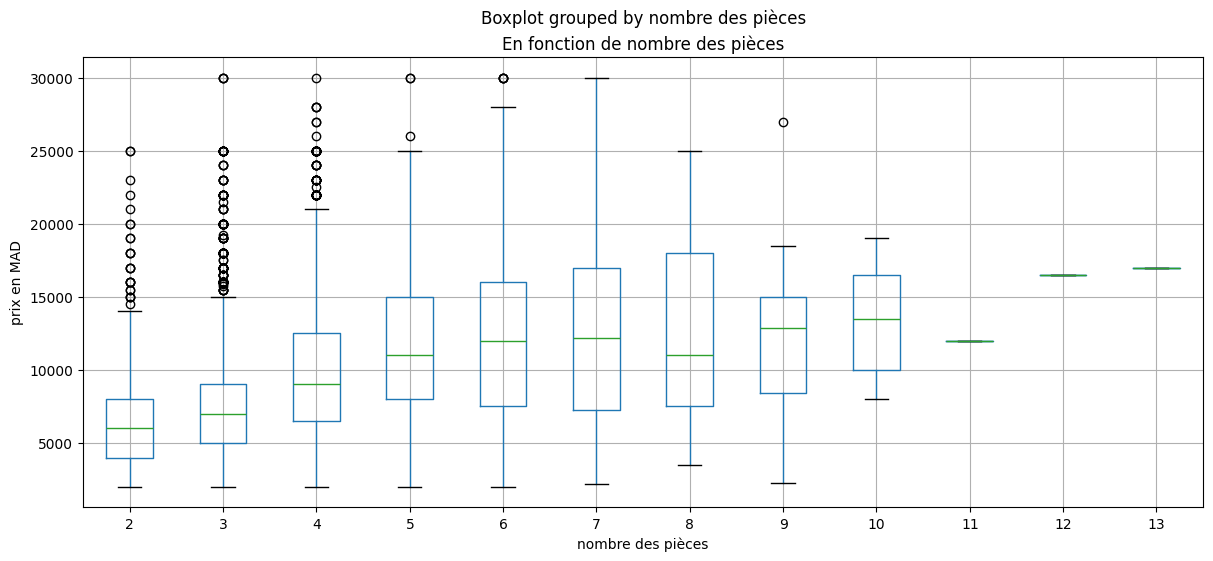

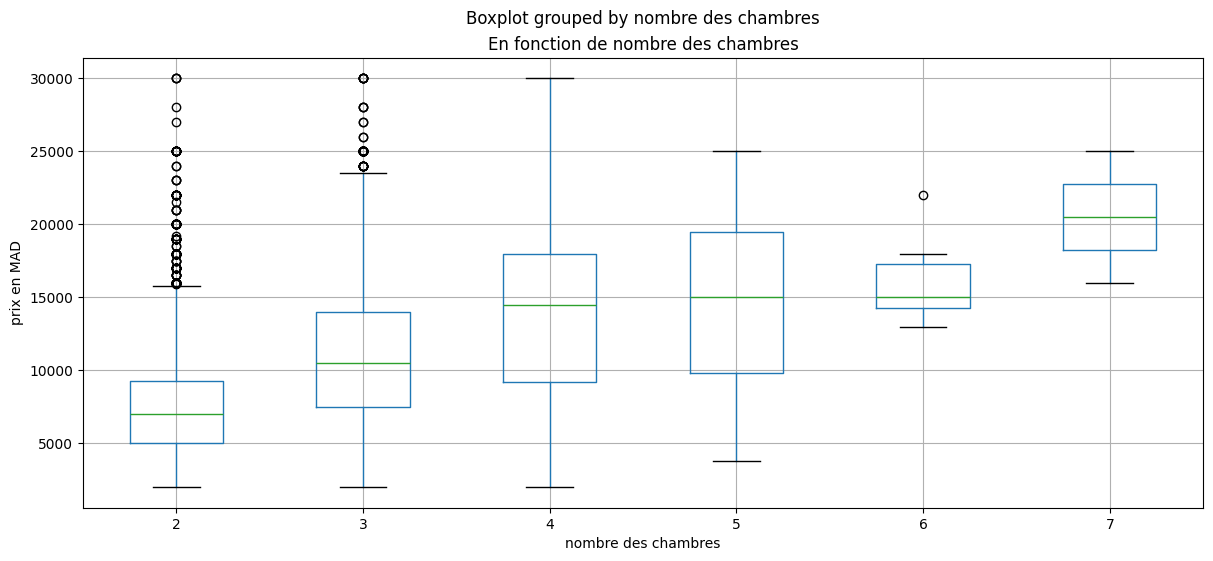

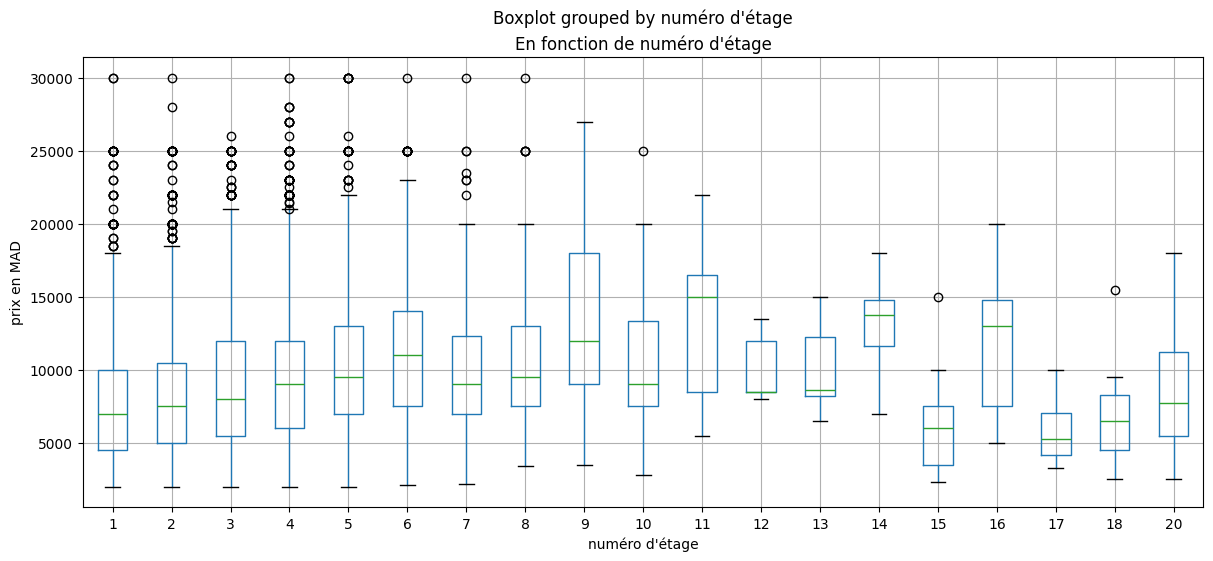

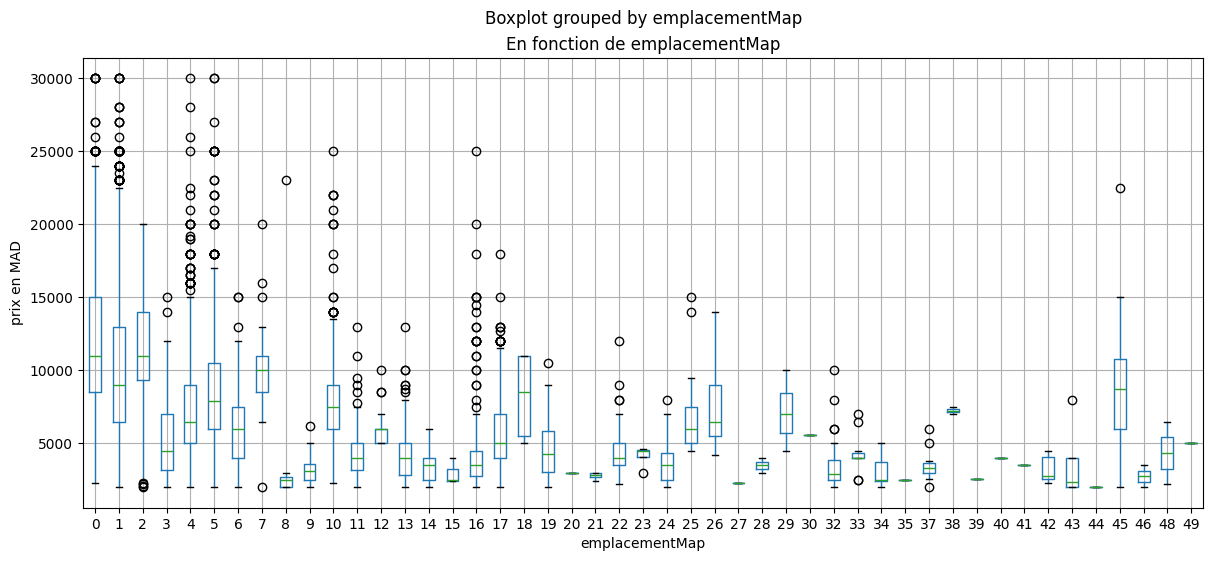

In [26]:
# Création de boîtes à moustaches pour certaines variables catégorielles
categories = ['nombre des pièces', 'nombre des chambres', 'numéro d\'étage', 'emplacementMap']
for col in categories:
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    df3.boxplot(column='prix en MAD', by=col, ax=ax)
    ax.set_title('En fonction de ' + col)
    ax.set_ylabel("prix en MAD")
plt.show()

In [27]:
# Division des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X = df3[['surface en m²', 'nombre des pièces', 'nombre des chambres', 'numéro d\'étage', 'emplacementMap']]
Y = df3['prix en MAD']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)
print('Donnees d entrainement : %d lignes\nDonnees de test: %d lignes' % (X_train.shape[0], X_test.shape[0]))

Donnees d entrainement : 8683 lignes
Donnees de test: 3722 lignes


In [28]:
#  erreur quadratique moyenne et score du modèle de régression linéaire
from sklearn.metrics import mean_squared_error, r2_score
# recherche sur la grille des degrés
from sklearn.model_selection import GridSearchCV
# Utilisation d'un modèle de Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer
# Définition de la grille des hyperparamètres à explorer

In [29]:
params = {
 'learning_rate': [0.1, 0.2 ,0.3, 1],
 'n_estimators' : [50, 100, 150, 200]
 }

# Création d'une instance de GradientBoostingRegressor
alg=GradientBoostingRegressor()

In [30]:
score = make_scorer(r2_score)
print(score)

make_scorer(r2_score)


In [31]:
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)

# Recherche des meilleurs hyperparamètres en utilisant les données d'entraînement
gridsearch.fit(X_train, y_train)

# Le meilleur modèle est maintenant accessible via l'attribut best_estimator_
model = gridsearch.best_estimator_
bestparam = gridsearch.best_params_
bestscore = gridsearch.best_score_
print("************************")
print(model, bestparam, bestscore)
print("************************")

************************
GradientBoostingRegressor(n_estimators=200) {'learning_rate': 0.1, 'n_estimators': 200} 0.6013671634612794
************************


[ 6628.94546013 13088.34746963 12227.62500896 ...  4627.55274338
  8825.0641989  16282.98728015]
variance: 8195019.495019385
ecartType: 2862.694446674214
R2: 0.6232882243523934


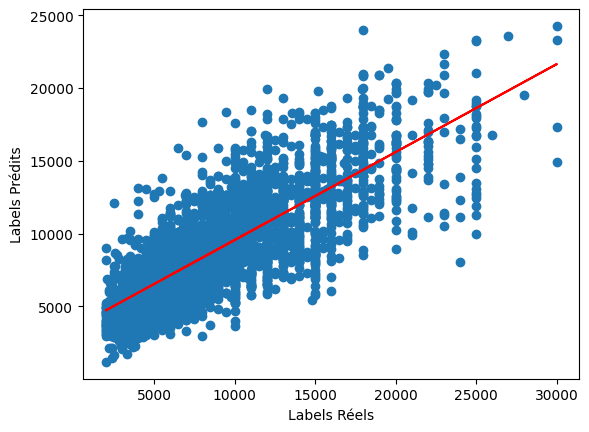

In [32]:
# Utilisation du meilleur modèle pour faire des prédictions
# Obtention des prédictions
predictions = model.predict(X_test)
print(predictions)
# Affichage des métriques de performance
variance = mean_squared_error(y_test, predictions)
print("variance:", variance)
ecartType = np.sqrt(variance)
print("ecartType:", ecartType)
r2 = r2_score(y_test, predictions)
print("R2:", r2)
# Affichage du nuage de points entre les valeurs réelles et prédites
plt.scatter(y_test, predictions)
plt.xlabel('Labels Réels')
plt.ylabel('Labels Prédits')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.show()